In [1]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
path = "../data/ex2data1.txt"  
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


2D visualisation

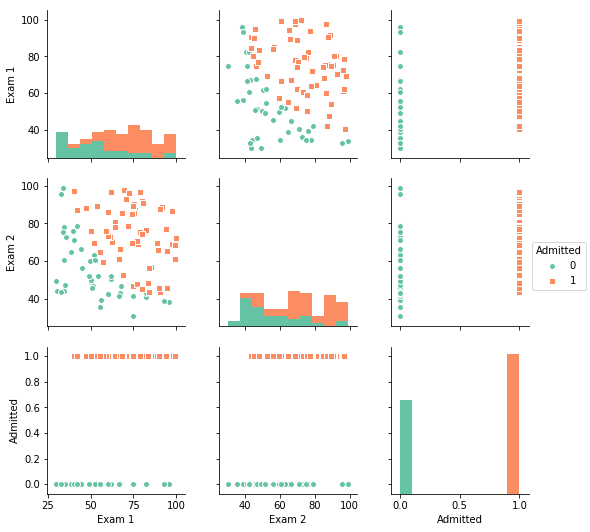

In [3]:
sns.pairplot(data, kind="scatter", hue="Admitted", markers=["o", "s"], palette="Set2")


# Logistic regression:

Logistic regression applies the sigmoid function to the linear regresion representation:

![alt text](LogReg_1.png "Title")


treat the data to define the linear model:

In [4]:
data.insert(0, 'Ones', 1)

In [5]:
cols = data.shape[1]  
X = data[['Ones','Exam 1','Exam 2']]
y = data[['Admitted']]
X = np.matrix(X.values)  
y = np.matrix(y.values) 

In [6]:
theta = np.matrix(np.array([0,0,0]))  

define the sigmoid function:

In [7]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

# Cost function:

The logistic regression cost function is defined in the folowing way (same style as a ML estimation):

![alt text](lecture6-logistic-regression_slide19.png "Title")



In [21]:
def computeCost(theta,X, y):
    theta = np.matrix(theta)
    h_theta = sigmoid(X * theta.T)
    inner = np.multiply(y, np.log(h_theta)) + np.multiply(1-y, np.log(1-h_theta)) 
    return np.sum(inner) / (-len(X))


With our parameters initialised at 0, this is :

In [9]:
computeCost(theta,X, y)  


0.6931471805599453

# Gradient descent to optimise parameters:

The gradient descent comes out to be equivalent to the one from linear regresion:

![alt text](v4iYn.png "Title")



In [12]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    

    for i in range(iters):
        h_theta = sigmoid(X * theta.T)

        error = h_theta-y

        for j in range(parameters):
            # term is 1 for theta0 and x1 for theta1, and is multiplied in vectorial from to the error computed before
            term = np.multiply(error, X[:,j])
            
            #this is the formula seen in the previous cell
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        #compute cost after each iteration
        cost[i] = computeCost(theta,X, y)

    return theta, cost

In [25]:
alpha = 0.001  
iters = 1000000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters) 

g, cost

(matrix([[-15.39517866,   0.12825989,   0.12247929]]),
 array([0.69829069, 0.65971176, 0.66162727, ..., 0.22465422, 0.22465419,
        0.22465416]))

Accuracy based on the minimised theta parameter values and the target:

In [14]:
def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

predictions = predict(g, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print 'accuracy = {0}%'.format(accuracy) 

accuracy = 89%


use an external minimisation procedure, based on the computed gradient and the cost functions:
    

In [19]:
def gradient(theta,X, y): 
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

In [23]:
import scipy.optimize as opt  
result = opt.fmin_tnc(func=computeCost, x0=np.zeros(3), fprime=gradient, args=(X, y))  
result

(array([-25.16131861,   0.20623159,   0.20147149]), 36, 0)

In [24]:
theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print 'accuracy = {0}%'.format(accuracy)  

accuracy = 89%


In [41]:
def predict_prob(theta, X):  
    probability = sigmoid(X * theta.T)
    return probability

predictions_prob = predict(theta_min, X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00651574 0.01298897 ... 0.08071035 0.0805486  0.07986116]
 [0.         0.01298897 0.02589316 ... 0.16089394 0.16057151 0.15920111]
 ...
 [0.         0.08071035 0.16089394 ... 0.99975673 0.99775318 0.9892379 ]
 [0.         0.0805486  0.16057151 ... 0.99775318 0.99575364 0.98725543]
 [0.         0.07986116 0.15920111 ... 0.9892379  0.98725543 0.97882974]]


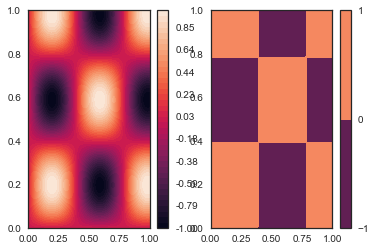

In [49]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2)

x = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, x)
Z = np.sin(X)*np.sin(Y)

levels = np.linspace(-1, 1, 40)

zdata = np.sin(8*X)*np.sin(8*Y)

print zdata
cs = axs[0].contourf(X, Y, zdata, levels=levels)
fig.colorbar(cs, ax=axs[0], format="%.2f")

cs = axs[1].contourf(X, Y, zdata, levels=[-1,0,1])
fig.colorbar(cs, ax=axs[1])

plt.show()